# Step 1 Uploaded Dataset

In [3]:
import pandas as pd

# Loading dataset
# df = pd.read_csv('/content/mbti_1_dataset.csv')
df = pd.read_csv('mbti_1.csv', encoding='utf-8', on_bad_lines='skip', engine='python')


# Info of dataset
print("Shape:", df.shape)
print(df.head())

print("\n")
# #Description of dataset
print("Dataset Description: \n", df.describe())

Shape: (8675, 2)
   type                                              posts
0  INFJ  'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1  ENTP  'I'm finding the lack of me in these posts ver...
2  INTP  'Good one  _____   https://www.youtube.com/wat...
3  INTJ  'Dear INTP,   I enjoyed our conversation the o...
4  ENTJ  'You're fired.|||That's another silly misconce...


Dataset Description: 
         type                                              posts
count   8675                                               8675
unique    16                                               8675
top     INFP  'It has been too long since I have been on per...
freq    1832                                                  1


# Step 2 Data Visualisation and Preprocessing



Number of posts for each MBTI Personality: 
 type
INFP    1832
INFJ    1470
INTP    1304
INTJ    1091
ENTP     685
ENFP     675
ISTP     337
ISFP     271
ENTJ     231
ISTJ     205
ENFJ     190
ISFJ     166
ESTP      89
ESFP      48
ESFJ      42
ESTJ      39
Name: count, dtype: int64


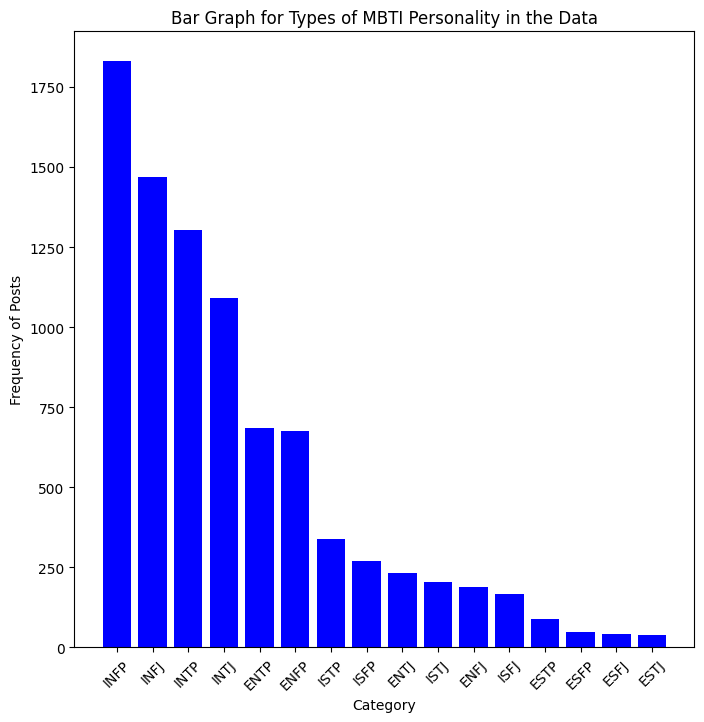

In [4]:
import matplotlib.pyplot as plt

# Plotting frequency of different categories
countCategory = df['type'].value_counts()
print('\n')

print("Number of posts for each MBTI Personality: \n",countCategory)

# Bar Graph
plt.figure(figsize=(8, 8))
plt.bar(countCategory.index, countCategory.values, color='blue')
plt.xlabel('Category')
plt.ylabel('Frequency of Posts')
plt.title('Bar Graph for Types of MBTI Personality in the Data')
plt.xticks(rotation=45)  # Rotate labels to prevent overlap
plt.show()

# Preprocessing

In [5]:

import string
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Download if not done already
nltk.download('stopwords')
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text_advanced(text):
    # 1. Lowercase
    text = text.lower()

    # 2. Remove URLs
    text = re.sub(r"http\S+|www\S+|https\S+", '', text)

    # 3. Remove usernames or mentions (e.g. @user)
    text = re.sub(r'@\w+', '', text)

    # 4. Remove numbers
    text = re.sub(r'\d+', '', text)

    # 5. Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))

    # 6. Tokenize (split into words)
    tokens = text.split()

    # 7. Remove stopwords and short words
    tokens = [word for word in tokens if word not in stop_words and len(word) > 2]

    # 8. Lemmatization (converts words to base form)
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    # 9. Join cleaned tokens back to string
    cleaned_text = ' '.join(tokens)

    return cleaned_text

# df['clean_posts'] = df['posts'].apply(clean_text)

# # View cleaned data
# df[['type', 'clean_posts']].head()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nagot\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\nagot\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [6]:
df['clean_posts'] = df['posts'].apply(clean_text_advanced)
df[['type', 'clean_posts']].head()

,type,clean_posts
0,INFJ,intj moment sportscenter top ten play prankswh...
1,ENTP,finding lack post alarmingsex boring position ...
2,INTP,good one course say know thats blessing cursed...
3,INTJ,dear intp enjoyed conversation day esoteric ga...
4,ENTJ,youre firedthats another silly misconception a...


In [7]:
print(df.head())

   type                                              posts  \
0  INFJ  'http://www.youtube.com/watch?v=qsXHcwe3krw|||...   
1  ENTP  'I'm finding the lack of me in these posts ver...   
2  INTP  'Good one  _____   https://www.youtube.com/wat...   
3  INTJ  'Dear INTP,   I enjoyed our conversation the o...   
4  ENTJ  'You're fired.|||That's another silly misconce...   

                                         clean_posts  
0  intj moment sportscenter top ten play prankswh...  
1  finding lack post alarmingsex boring position ...  
2  good one course say know thats blessing cursed...  
3  dear intp enjoyed conversation day esoteric ga...  
4  youre firedthats another silly misconception a...  


In [8]:
# Create 4 binary labels
df['IE'] = df['type'].apply(lambda x: 1 if x[0] == 'I' else 0)  # 1 = I, 0 = E
df['NS'] = df['type'].apply(lambda x: 1 if x[1] == 'N' else 0)  # 1 = N, 0 = S
df['TF'] = df['type'].apply(lambda x: 1 if x[2] == 'T' else 0)  # 1 = T, 0 = F
df['JP'] = df['type'].apply(lambda x: 1 if x[3] == 'J' else 0)  # 1 = J, 0 = P

print(df[['type', 'IE', 'NS', 'TF', 'JP']].head())

   type  IE  NS  TF  JP
0  INFJ   1   1   0   1
1  ENTP   0   1   1   0
2  INTP   1   1   1   0
3  INTJ   1   1   1   1
4  ENTJ   0   1   1   1


In [9]:
df.to_csv('mbti_preprocessed.csv', index=False)

In [10]:
print(df.head())

   type                                              posts  \
0  INFJ  'http://www.youtube.com/watch?v=qsXHcwe3krw|||...   
1  ENTP  'I'm finding the lack of me in these posts ver...   
2  INTP  'Good one  _____   https://www.youtube.com/wat...   
3  INTJ  'Dear INTP,   I enjoyed our conversation the o...   
4  ENTJ  'You're fired.|||That's another silly misconce...   

                                         clean_posts  IE  NS  TF  JP  
0  intj moment sportscenter top ten play prankswh...   1   1   0   1  
1  finding lack post alarmingsex boring position ...   0   1   1   0  
2  good one course say know thats blessing cursed...   1   1   1   0  
3  dear intp enjoyed conversation day esoteric ga...   1   1   1   1  
4  youre firedthats another silly misconception a...   0   1   1   1  


## Feature Extraction

In [11]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
import pickle
import os

In [12]:
def extract_tfidf_features(df, text_column='clean_posts', max_features=5000):

    print(f"Extracting TF-IDF features from {len(df)} documents...")
    print(f"Using column: {text_column}")


    # Initialize TF-IDF vectorizer
    vectorizer = TfidfVectorizer(
        max_features=max_features,
        ngram_range=(1, 2),  # Unigrams and bigrams
        min_df=2,            # Ignore terms that appear in less than 2 documents
        max_df=0.95,         # Ignore terms that appear in more than 95% of documents
        stop_words='english' # Additional stopword filtering
    )

    # Fit and transform the cleaned text
    print("Fitting TF-IDF vectorizer...")
    tfidf_matrix = vectorizer.fit_transform(df[text_column])
    feature_names = vectorizer.get_feature_names_out().tolist()

    print(f"✅ Extracted {len(feature_names)} TF-IDF features")
    print(f"📊 Feature matrix shape: {tfidf_matrix.shape}")

    # Convert to DataFrame
    print("Converting to DataFrame...")
    feature_df = pd.DataFrame(tfidf_matrix.toarray(), columns=feature_names)

    # Add your existing labels and metadata
    feature_df['type'] = df['type'].values
    feature_df['IE'] = df['IE'].values
    feature_df['NS'] = df['NS'].values
    feature_df['TF'] = df['TF'].values
    feature_df['JP'] = df['JP'].values

    # Optionally add original posts for reference
    feature_df['original_posts'] = df['posts'].values
    feature_df['clean_posts'] = df['clean_posts'].values

    return feature_df, vectorizer

In [13]:
print(df.columns)

Index(['type', 'posts', 'clean_posts', 'IE', 'NS', 'TF', 'JP'], dtype='object')


In [14]:
def main():
    """Main function for TF-IDF feature extraction"""

    # Configuration
    CSV_PATH = r'mbti_preprocessed.csv'
    OUTPUT_FILE = 'mbti_tfidf_features.csv'
    VECTORIZER_FILE = 'tfidf_vectorizer.pkl'
    MAX_FEATURES = 5000

    try:
        # Load your preprocessed data
        print("🔄 Loading preprocessed data...")
        df = pd.read_csv(CSV_PATH)
        print(f"📊 Data shape: {df.shape}")

        # Check if you have the required columns
        required_columns = ['posts', 'type', 'clean_posts', 'IE', 'NS', 'TF', 'JP']
        missing_columns = [col for col in required_columns if col not in df.columns]

        if missing_columns:
            print(f"❌ Missing columns: {missing_columns}")
            print(f"Available columns: {df.columns.tolist()}")
            return

        # If clean_posts doesn't exist, run preprocessing first
        if 'clean_posts' not in df.columns:
            print("❌ 'clean_posts' column not found. Please run preprocessing first.")
            return

        # Extract TF-IDF features
        print("🔄 Starting TF-IDF feature extraction...")
        df = df.fillna('')
        feature_df, vectorizer = extract_tfidf_features(
            df,
            text_column='clean_posts',
            max_features=MAX_FEATURES
        )

        # Save features
        print(f"💾 Saving features to {OUTPUT_FILE}...")
        feature_df.to_csv(OUTPUT_FILE, index=False)

        # Save vectorizer for future use
        print(f"💾 Saving vectorizer to {VECTORIZER_FILE}...")
        with open(VECTORIZER_FILE, 'wb') as f:
            pickle.dump(vectorizer, f)

        # Display summary
        print(f"\n✅ Feature extraction completed successfully!")
        print(f"📁 Features saved to: {OUTPUT_FILE}")
        print(f"📁 Vectorizer saved to: {VECTORIZER_FILE}")
        print(f"📊 Total features: {len(feature_df.columns)}")

        # Feature breakdown
        tfidf_features = [col for col in feature_df.columns if col not in ['type', 'IE', 'NS', 'TF', 'JP', 'original_posts', 'clean_posts']]
        print(f"📊 TF-IDF features: {len(tfidf_features)}")
        print(f"📊 Label columns: 5 (type, IE, NS, TF, JP)")
        print(f"📊 Text columns: 2 (original_posts, clean_posts)")

        # Show first few feature names
        print(f"\n🔍 Sample TF-IDF features:")
        for i, feature in enumerate(tfidf_features[:10]):
            print(f"  {i+1}. {feature}")

        # Show data preview
        print(f"\n👀 Data preview:")
        print(feature_df[['type', 'IE', 'NS', 'TF', 'JP'] + tfidf_features[:5]].head())

    except Exception as e:
        print(f"❌ Error: {e}")
        import traceback
        traceback.print_exc()

if __name__ == "__main__":
    main()

🔄 Loading preprocessed data...
📊 Data shape: (8675, 7)
🔄 Starting TF-IDF feature extraction...
Extracting TF-IDF features from 8675 documents...
Using column: clean_posts
Fitting TF-IDF vectorizer...
✅ Extracted 5000 TF-IDF features
📊 Feature matrix shape: (8675, 5000)
Converting to DataFrame...
💾 Saving features to mbti_tfidf_features.csv...
💾 Saving vectorizer to tfidf_vectorizer.pkl...

✅ Feature extraction completed successfully!
📁 Features saved to: mbti_tfidf_features.csv
📁 Vectorizer saved to: tfidf_vectorizer.pkl
📊 Total features: 5006
📊 TF-IDF features: 4999
📊 Label columns: 5 (type, IE, NS, TF, JP)
📊 Text columns: 2 (original_posts, clean_posts)

🔍 Sample TF-IDF features:
  1. ability
  2. able
  3. abouti
  4. absolute
  5. absolutely
  6. absolutely love
  7. absorbed
  8. abstract
  9. absurd
  10. abuse

👀 Data preview:
   type  IE  NS  TF  JP   ability      able  abouti  absolute  absolutely
0  INFJ   1   1   0   1  0.000000  0.000000     0.0  0.000000    0.000000
1  ENT

# Step 3  Model Training

# Logistic Regression



In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Config
FEATURE_CSV = 'mbti_tfidf_features.csv'

# 1. Load TF-IDF Features
print("🔄 Loading TF-IDF features...")
df = pd.read_csv(FEATURE_CSV)

# 2. Split into features and labels
X = df.drop(columns=['type', 'IE', 'NS', 'TF', 'JP', 'original_posts', 'clean_posts'])
y = df['type']

# 3. Train/test split
print("🔀 Splitting into train and test sets...")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Train Logistic Regression
print("⚙️ Training Logistic Regression...")
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# 5. Make predictions
y_pred = model.predict(X_test)

# 6. Evaluate model
print("\n✅ Evaluation Metrics:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))




🔄 Loading TF-IDF features...
🔀 Splitting into train and test sets...
⚙️ Training Logistic Regression...

✅ Evaluation Metrics:
Accuracy: 0.6242

Classification Report:
              precision    recall  f1-score   support

        ENFJ       0.50      0.12      0.20        41
        ENFP       0.67      0.56      0.61       125
        ENTJ       0.72      0.30      0.42        44
        ENTP       0.68      0.53      0.59       135
        ESFJ       0.00      0.00      0.00         7
        ESFP       0.00      0.00      0.00         8
        ESTJ       0.00      0.00      0.00         7
        ESTP       1.00      0.07      0.12        15
        INFJ       0.63      0.66      0.64       288
        INFP       0.59      0.84      0.69       370
        INTJ       0.59      0.69      0.64       193
        INTP       0.64      0.81      0.72       293
        ISFJ       0.90      0.20      0.33        45
        ISFP       0.56      0.19      0.28        53
        ISTJ       0.

C:\Users\nagot\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\nagot\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\nagot\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capital

# Logistic Regression with class_weight='balanced'

In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Config
FEATURE_CSV = 'mbti_tfidf_features.csv'

# 1. Load TF-IDF Features
print("🔄 Loading TF-IDF features...")
df = pd.read_csv(FEATURE_CSV)

# 2. Split into features and labels
X = df.drop(columns=['type', 'IE', 'NS', 'TF', 'JP', 'original_posts', 'clean_posts'])
y = df['type']

# 3. Train/test split
print("🔀 Splitting into train and test sets...")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Train Logistic Regression
print("⚙️ Training Logistic Regression...")
model = LogisticRegression(max_iter=1000,class_weight='balanced')
model.fit(X_train, y_train)

# 5. Make predictions
y_pred = model.predict(X_test)

# 6. Evaluate model
print("\n✅ Evaluation Metrics:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


🔄 Loading TF-IDF features...
🔀 Splitting into train and test sets...
⚙️ Training Logistic Regression...

✅ Evaluation Metrics:
Accuracy: 0.6559

Classification Report:
              precision    recall  f1-score   support

        ENFJ       0.53      0.49      0.51        41
        ENFP       0.65      0.67      0.66       125
        ENTJ       0.41      0.64      0.50        44
        ENTP       0.60      0.62      0.61       135
        ESFJ       0.11      0.29      0.15         7
        ESFP       0.00      0.00      0.00         8
        ESTJ       0.30      0.43      0.35         7
        ESTP       0.70      0.47      0.56        15
        INFJ       0.72      0.58      0.64       288
        INFP       0.75      0.74      0.74       370
        INTJ       0.64      0.65      0.65       193
        INTP       0.73      0.75      0.74       293
        ISFJ       0.67      0.53      0.59        45
        ISFP       0.50      0.58      0.54        53
        ISTJ       0.

# Linear SVM with class_weight='balanced'

In [17]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# Load feature data
df = pd.read_csv('mbti_tfidf_features.csv')

# Features and target
X = df.drop(columns=['type', 'IE', 'NS', 'TF', 'JP', 'original_posts', 'clean_posts'])
y = df['type']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Initialize SVM model
model = LinearSVC(class_weight='balanced', max_iter=5000)  # Use 'balanced' to handle class imbalance

# Train model
print("🔄 Training SVM...")
model.fit(X_train, y_train)

# Predict
print("🔍 Predicting...")
y_pred = model.predict(X_test)

# Evaluate
print("\n📊 Classification Report:")
print(classification_report(y_test, y_pred))

print("✅ Accuracy:", accuracy_score(y_test, y_pred))


🔄 Training SVM...
🔍 Predicting...

📊 Classification Report:
              precision    recall  f1-score   support

        ENFJ       0.43      0.47      0.45        38
        ENFP       0.60      0.56      0.58       135
        ENTJ       0.36      0.48      0.41        46
        ENTP       0.50      0.57      0.53       137
        ESFJ       0.43      0.33      0.38         9
        ESFP       0.00      0.00      0.00        10
        ESTJ       0.50      0.38      0.43         8
        ESTP       0.47      0.50      0.49        18
        INFJ       0.70      0.63      0.67       294
        INFP       0.71      0.70      0.71       366
        INTJ       0.58      0.60      0.59       218
        INTP       0.66      0.65      0.66       261
        ISFJ       0.55      0.52      0.53        33
        ISFP       0.47      0.52      0.50        54
        ISTJ       0.42      0.41      0.42        41
        ISTP       0.54      0.64      0.59        67

    accuracy        

C:\Users\nagot\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\nagot\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\nagot\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capital

# Training on all 4 Binary Classifiers
# IE

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split

# Load feature data
df = pd.read_csv('mbti_tfidf_features.csv')

# Prepare binary classification for IE (Introvert vs Extrovert)
X = df.drop(columns=['type', 'IE', 'NS', 'TF', 'JP', 'original_posts', 'clean_posts'])
y = df['IE']  # Binary target: 0 or 1

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# Logistic Regression with class balancing
model_IE = LogisticRegression(class_weight='balanced', max_iter=5000)
model_IE.fit(X_train, y_train)

# Predictions
y_pred = model_IE.predict(X_test)

# Evaluation
print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("📊 Classification Report:")
print(classification_report(y_test, y_pred))


✅ Accuracy: 0.8403458213256484
📊 Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.73      0.68       400
           1       0.91      0.87      0.89      1335

    accuracy                           0.84      1735
   macro avg       0.77      0.80      0.79      1735
weighted avg       0.85      0.84      0.84      1735



# NS

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split

# Load feature data
df = pd.read_csv('mbti_tfidf_features.csv')

# Prepare binary classification for IE (Introvert vs Extrovert)
X = df.drop(columns=['type', 'IE', 'NS', 'TF', 'JP', 'original_posts', 'clean_posts'])
y = df['NS']  # Binary target: 0 or 1

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# Logistic Regression with class balancing
model_NS = LogisticRegression(class_weight='balanced', max_iter=5000)
model_NS.fit(X_train, y_train)

# Predictions
y_pred = model_NS.predict(X_test)

# Evaluation
print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("📊 Classification Report:")
print(classification_report(y_test, y_pred))


✅ Accuracy: 0.8778097982708933
📊 Classification Report:
              precision    recall  f1-score   support

           0       0.54      0.77      0.63       239
           1       0.96      0.90      0.93      1496

    accuracy                           0.88      1735
   macro avg       0.75      0.83      0.78      1735
weighted avg       0.90      0.88      0.89      1735



# TF

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split

# Load feature data
df = pd.read_csv('mbti_tfidf_features.csv')

# Prepare binary classification for IE (Introvert vs Extrovert)
X = df.drop(columns=['type', 'IE', 'NS', 'TF', 'JP', 'original_posts', 'clean_posts'])
y = df['TF']  # Binary target: 0 or 1

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# Logistic Regression with class balancing
model_TF = LogisticRegression(class_weight='balanced', max_iter=5000)
model_TF.fit(X_train, y_train)

# Predictions
y_pred = model_TF.predict(X_test)

# Evaluation
print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("📊 Classification Report:")
print(classification_report(y_test, y_pred))


✅ Accuracy: 0.8414985590778098
📊 Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.83      0.85       939
           1       0.81      0.85      0.83       796

    accuracy                           0.84      1735
   macro avg       0.84      0.84      0.84      1735
weighted avg       0.84      0.84      0.84      1735



# JP

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split

# Load feature data
df = pd.read_csv('mbti_tfidf_features.csv')

# Prepare binary classification for IE (Introvert vs Extrovert)
X = df.drop(columns=['type', 'IE', 'NS', 'TF', 'JP', 'original_posts', 'clean_posts'])
y = df['JP']  # Binary target: 0 or 1

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# Logistic Regression with class balancing
model_JP = LogisticRegression(class_weight='balanced', max_iter=5000)
model_JP.fit(X_train, y_train)

# Predictions
y_pred = model_JP.predict(X_test)

# Evaluation
print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("📊 Classification Report:")
print(classification_report(y_test, y_pred))


✅ Accuracy: 0.809221902017291
📊 Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.83      0.84      1048
           1       0.75      0.77      0.76       687

    accuracy                           0.81      1735
   macro avg       0.80      0.80      0.80      1735
weighted avg       0.81      0.81      0.81      1735



# Combined Accuracy of all 4 Binary Classifier

In [22]:
import pandas as pd

# Assuming you have these predictions already
# These should be Series or numpy arrays of 0/1 values
# Replace these with your actual predictions
IE_pred = model_IE.predict(X_test)
NS_pred = model_NS.predict(X_test)
TF_pred = model_TF.predict(X_test)
JP_pred = model_JP.predict(X_test)

# Map binary values to corresponding characters
def bin_to_mbti(ie, ns, tf, jp):
    return (
        ('I' if ie == 1 else 'E') +
        ('N' if ns == 1 else 'S') +
        ('T' if tf == 1 else 'F') +
        ('J' if jp == 1 else 'P')
    )

# Combine predictions
combined_mbti = [
    bin_to_mbti(ie, ns, tf, jp)
    for ie, ns, tf, jp in zip(IE_pred, NS_pred, TF_pred, JP_pred)
]

# Optional: evaluate against actual types if you have them
actual_mbti = df.loc[X_test.index, 'type']

# Accuracy of full MBTI prediction
correct = sum(p == a for p, a in zip(combined_mbti, actual_mbti))
accuracy = correct / len(actual_mbti)

print("✅ Combined MBTI Prediction Accuracy:", round(accuracy * 100, 2), "%")

# Optional: add predictions to a DataFrame and save
result_df = X_test.copy()
result_df['actual_type'] = actual_mbti.values
result_df['predicted_type'] = combined_mbti
result_df.to_csv("combined_mbti_predictions.csv", index=False)


✅ Combined MBTI Prediction Accuracy: 63.52 %


# Random forest on all 4 Binary Classifiers

In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder

# Load TF-IDF features file
df = pd.read_csv('mbti_tfidf_features.csv')

# Feature columns (excluding labels and text)
label_cols = ['IE', 'NS', 'TF', 'JP', 'type', 'original_posts', 'clean_posts']
feature_cols = [col for col in df.columns if col not in label_cols]

# Store predicted binary traits
predictions = {}

# Store true binary traits
true_labels = {}

# Train/test split consistent across all traits
X = df[feature_cols]
y_all = df[['IE', 'NS', 'TF', 'JP']]
X_train, X_test, y_train_all, y_test_all = train_test_split(X, y_all, test_size=0.2, random_state=42)

# Iterate through each binary trait
for trait in ['IE', 'NS', 'TF', 'JP']:
    print(f"\n🔍 Training Random Forest model for trait: {trait}")

    y_train = y_train_all[trait]
    y_test = y_test_all[trait]

    # Train model
    rf = RandomForestClassifier(random_state=42, class_weight='balanced')
    rf.fit(X_train, y_train)

    # Predict
    y_pred = rf.predict(X_test)
    predictions[trait] = y_pred
    true_labels[trait] = y_test.values

    # Metrics
    acc = accuracy_score(y_test, y_pred)
    print(f"✅ Accuracy for {trait}: {acc * 100:.2f}%")
    print(classification_report(y_test, y_pred))

# Combine all predicted binary traits to get MBTI type
combined_preds = []
combined_truth = []

for i in range(len(X_test)):
    mbti_pred = ''.join([
        'I' if predictions['IE'][i] == 1 else 'E',
        'N' if predictions['NS'][i] == 1 else 'S',
        'T' if predictions['TF'][i] == 1 else 'F',
        'J' if predictions['JP'][i] == 1 else 'P'
    ])
    mbti_true = ''.join([
        'I' if true_labels['IE'][i] == 1 else 'E',
        'N' if true_labels['NS'][i] == 1 else 'S',
        'T' if true_labels['TF'][i] == 1 else 'F',
        'J' if true_labels['JP'][i] == 1 else 'P'
    ])
    combined_preds.append(mbti_pred)
    combined_truth.append(mbti_true)

# Evaluate combined accuracy
overall_acc = accuracy_score(combined_truth, combined_preds)
print(f"\n📊 Final MBTI Accuracy: {overall_acc * 100:.2f}%")







🔍 Training Random Forest model for trait: IE
✅ Accuracy for IE: 78.44%
              precision    recall  f1-score   support

           0       0.83      0.03      0.05       382
           1       0.78      1.00      0.88      1353

    accuracy                           0.78      1735
   macro avg       0.81      0.51      0.46      1735
weighted avg       0.79      0.78      0.70      1735


🔍 Training Random Forest model for trait: NS
✅ Accuracy for NS: 85.94%
              precision    recall  f1-score   support

           0       1.00      0.01      0.02       246
           1       0.86      1.00      0.92      1489

    accuracy                           0.86      1735
   macro avg       0.93      0.50      0.47      1735
weighted avg       0.88      0.86      0.80      1735


🔍 Training Random Forest model for trait: TF
✅ Accuracy for TF: 79.83%
              precision    recall  f1-score   support

           0       0.78      0.87      0.82       937
           1       0.

# Based on all evaluation Logistic Regression for all 4 Binary classifier is selected as final model



# Step 4 Save Models and Vectorizer


In [24]:

import joblib
joblib.dump(model_IE, 'model_IE.pkl')
joblib.dump(model_NS, 'model_NS.pkl')
joblib.dump(model_TF, 'model_TF.pkl')
joblib.dump(model_JP, 'model_JP.pkl')

# tfidf_vectorizer already saved

['model_JP.pkl']